In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_csv("https://raw.githubusercontent.com/RanjitM007/DATASETS/main/Agriculture%20Crop%20Damage/test_pFkWwen.csv")
df_test=pd.read_csv("https://raw.githubusercontent.com/RanjitM007/DATASETS/main/Agriculture%20Crop%20Damage/train_yaOffsB.csv")

# Column Name → Description
Id UniqueID

Estimated_Insects_Count → Estimated insects count per square meter

Crop_Type → Category of Crop(0,1)

Soil_Type → Category of Soil (0,1)

Pesticide_Use_Category → Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)

Number_Doses_Week →Number of doses per week

Number_Weeks_Used → Number of weeks used

Number_Weeks_Quit → Number of weeks quit

Season → Season Category (1,2,3)

Crop_Damage →Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

In [3]:
df_train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [4]:
#check the shape of df_train
df_train.shape

(59310, 9)

Here we have 59310 rows and 9 columns

In [5]:
#check the dtypes
df_train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [6]:
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In df_train we have two  data types object and numeric

In [7]:
#check shape of df_test
df_test.shape

(88858, 10)

here we have 88858 rows and 10 columns

In [8]:
#check the data types 
df_test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

it have object and numeric two data types

In [9]:
df_agr=pd.concat([df_train,df_test],sort=False)
df_agr

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000002,188,1,1,1,0,NaN,0,2,NaN
1,F00000007,410,1,1,1,0,0.0,0,2,NaN
2,F00000011,626,1,0,1,0,0.0,0,2,NaN
3,F00000013,731,1,0,1,0,0.0,0,2,NaN
4,F00000014,789,0,0,1,0,0.0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0.0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0.0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0.0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0.0


In [10]:
df_agr.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                float64
dtype: object

In [11]:
df_agr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148168 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       148168 non-null  object 
 1   Estimated_Insects_Count  148168 non-null  int64  
 2   Crop_Type                148168 non-null  int64  
 3   Soil_Type                148168 non-null  int64  
 4   Pesticide_Use_Category   148168 non-null  int64  
 5   Number_Doses_Week        148168 non-null  int64  
 6   Number_Weeks_Used        133275 non-null  float64
 7   Number_Weeks_Quit        148168 non-null  int64  
 8   Season                   148168 non-null  int64  
 9   Crop_Damage              88858 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 12.4+ MB


In [12]:
df_agr.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [13]:
df_agr["Crop_Damage"]=df_agr["Crop_Damage"].replace({0.0:"Alive",1.0:"Other Cause",2.0:"Pesticides"})
df_agr["Crop_Damage"].value_counts()

Alive          74238
Other Cause    12307
Pesticides      2313
Name: Crop_Damage, dtype: int64

Observation:-  Here we observe that 74238 crop alive ,12307 are damaged by other cause and 2313 are damaged due to pesticides

In [14]:
df_agr.isnull().sum()

ID                             0
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used          14893
Number_Weeks_Quit              0
Season                         0
Crop_Damage                59310
dtype: int64

In NUmber_weeks_used and crop_damage lot of null value present

<Axes: >

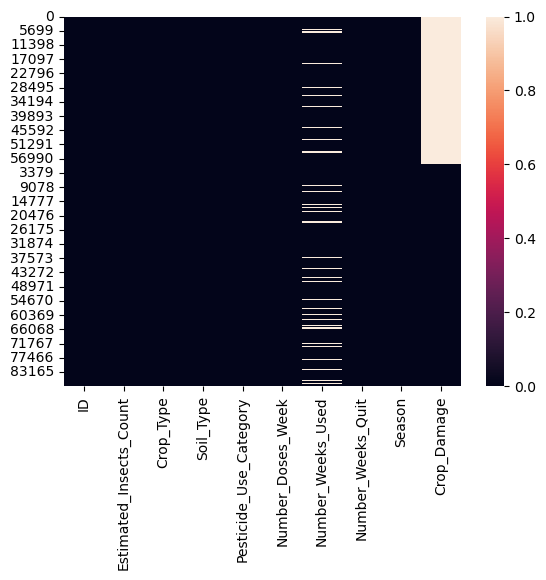

In [15]:
#heatmap for showing null value
sns.heatmap(df_agr.isnull())

    In above  null values clearly visible by differenet colour bar

In [16]:
#filling null value
col_to_impute=["Number_Weeks_Used","Crop_Damage"]
for col in col_to_impute:
    if df_agr[col].dtypes!="object":
        df_agr[col].fillna(df_agr[col].mean(),inplace=True)
    else:
        df_agr[col].fillna(df_agr[col].mode()[0],inplace=True)

<Axes: >

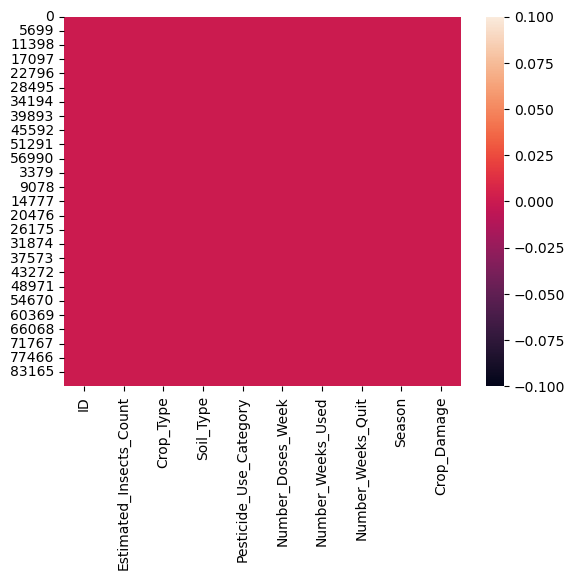

In [17]:
sns.heatmap(df_agr.isnull())

In [18]:
df_agr.isnull().values.any()

False

# Statistics analysis

In [19]:
df_agr.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000
mean,1398.212401,0.285453,0.457096,2.263802,25.850724,28.656485,9.565324,1.898527
std,849.197419,0.451631,0.498158,0.461755,15.525407,11.763780,9.882540,0.701568
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.656485,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


Observation

In above we observe that Estimated_insects_count has highest std .and Estimated_insects_count,number_doses_week,number_weeks_used,number_weeks_quit they all have outliers


# correlation

In [20]:
cor=df_agr.corr()
cor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,-0.090363,-0.056379,-0.082212,-0.102897,0.413700,0.299628,-0.001141
Crop_Type,-0.090363,1.000000,-0.289331,0.234132,-0.191225,-0.041950,-0.234154,0.002445
Soil_Type,-0.056379,-0.289331,1.000000,0.034108,0.079209,-0.064926,0.009091,0.000163
Pesticide_Use_Category,-0.082212,0.234132,0.034108,1.000000,-0.000223,0.326650,-0.552969,-0.000078
Number_Doses_Week,-0.102897,-0.191225,0.079209,-0.000223,1.000000,0.120231,-0.038623,-0.000210
Number_Weeks_Used,0.413700,-0.041950,-0.064926,0.326650,0.120231,1.000000,-0.424582,0.001249
Number_Weeks_Quit,0.299628,-0.234154,0.009091,-0.552969,-0.038623,-0.424582,1.000000,0.001636
Season,-0.001141,0.002445,0.000163,-0.000078,-0.000210,0.001249,0.001636,1.000000


<Axes: >

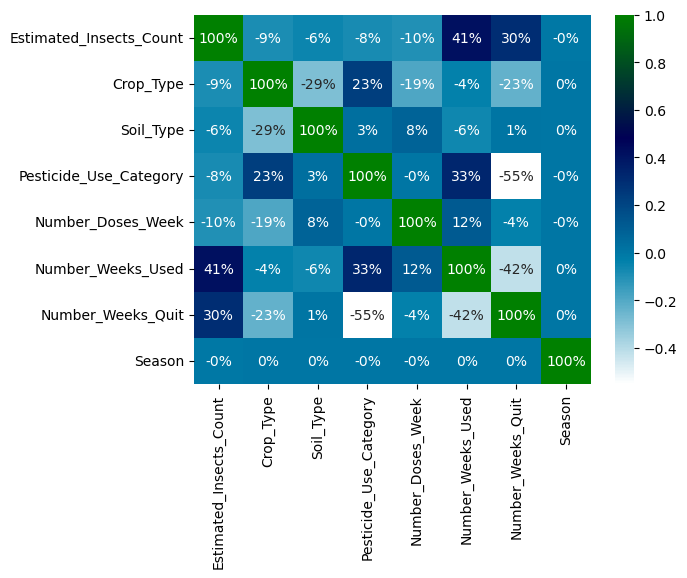

In [21]:
#plot heatmap for better visualization

sns.heatmap(cor,annot=True,fmt=".0%",cmap="ocean_r")

Observation :-

we can see Number_weeks_used , Estimated_insects_count ,Number_weeks_quit,pesticide_used_category are highily correlated and season has no correlation with other  

In [37]:
df_agr.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                 object
dtype: object

# Outliers

In [ ]:
#for finding outliers we can plot boxplot 

#for i in df_agr.columns[:2]:
    #if df_agr[i].dtypes!="object":
        #sns.boxplot(df_agr[i])
        #plt.show()

<Axes: >

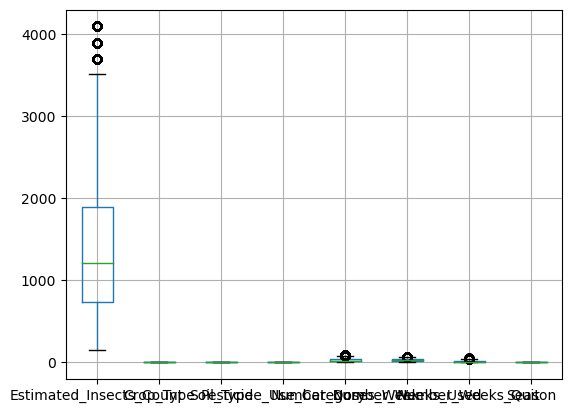

In [35]:
df_agr.boxplot()

In estimated_insects_count has more outliers 

# Estimated_insects_count

<Axes: xlabel='Estimated_Insects_Count'>

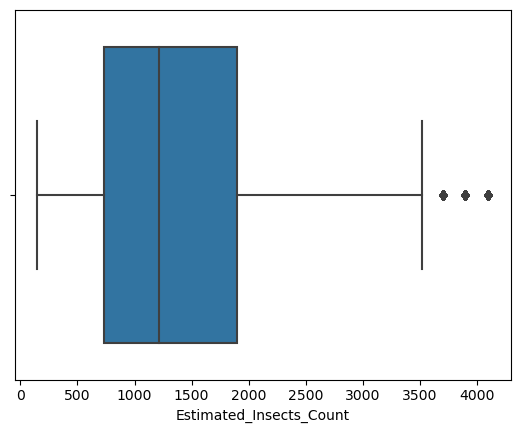

In [26]:
sns.boxplot(data=df_agr,x="Estimated_Insects_Count")

Here after 3500 we have outliers 

# Crop_type

<Axes: xlabel='Crop_Type'>

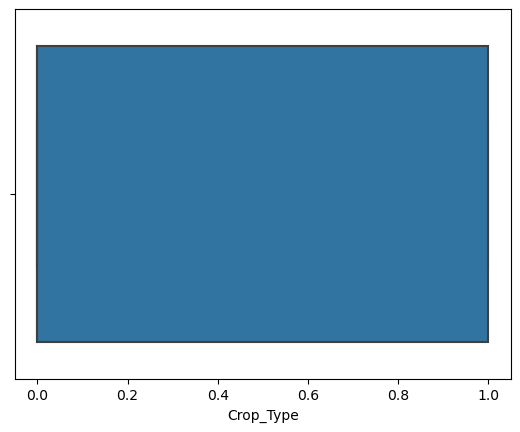

In [28]:
sns.boxplot(data=df_agr,x="Crop_Type")

# Soil_type

<Axes: xlabel='Soil_Type'>

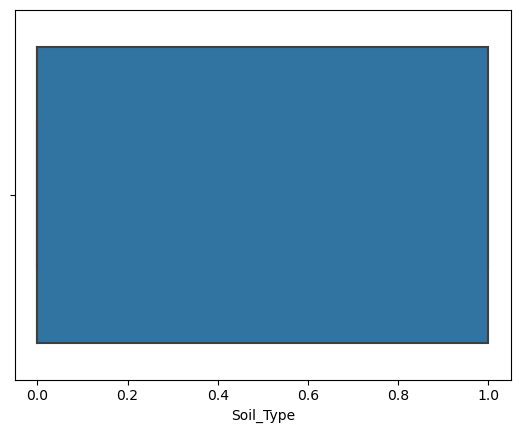

In [29]:
sns.boxplot(data=df_agr,x="Soil_Type")

# Pesticide_Use_Category

<Axes: xlabel='Pesticide_Use_Category'>

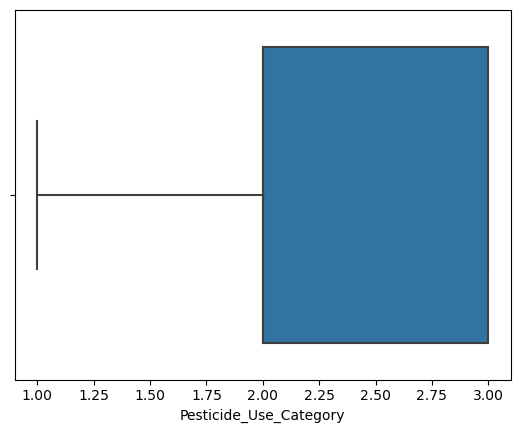

In [30]:
sns.boxplot(data=df_agr,x="Pesticide_Use_Category")

# Number_Doses_Week

<Axes: xlabel='Number_Doses_Week'>

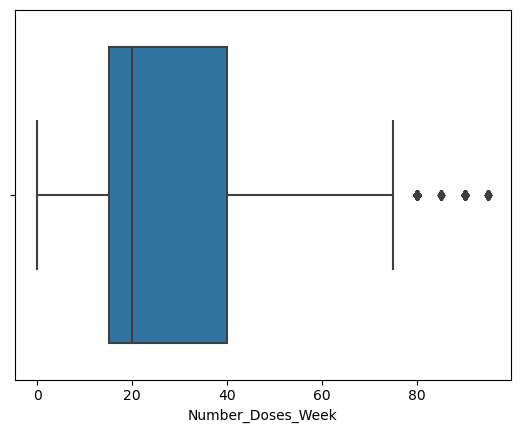

In [31]:
sns.boxplot(data=df_agr,x="Number_Doses_Week")

Here we have some outliers

# Number_Weeks_Used

<Axes: xlabel='Number_Weeks_Used'>

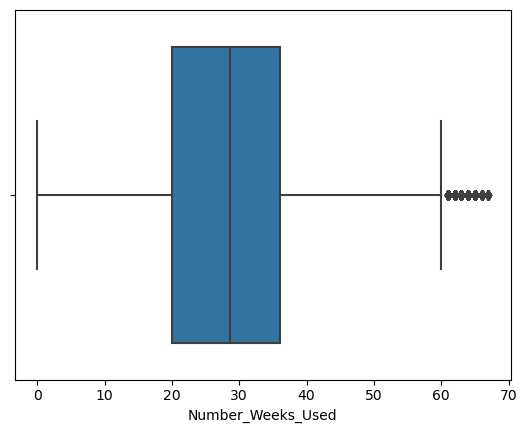

In [33]:
sns.boxplot(data=df_agr,x="Number_Weeks_Used")

here also some outliers are present

# Number_Weeks_Quit

<Axes: xlabel='Number_Weeks_Quit'>

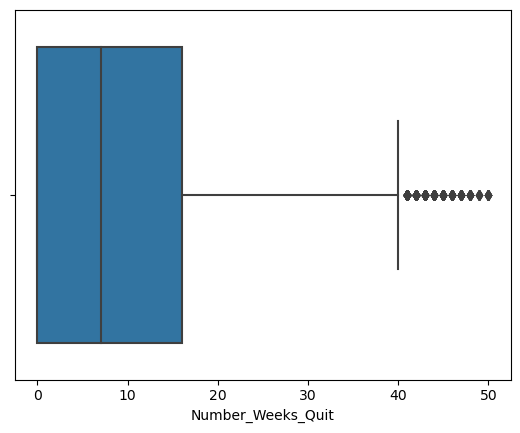

In [38]:
sns.boxplot(data=df_agr,x="Number_Weeks_Quit")

 Here also a lot of outliers are present

# Season  

<Axes: xlabel='Season'>

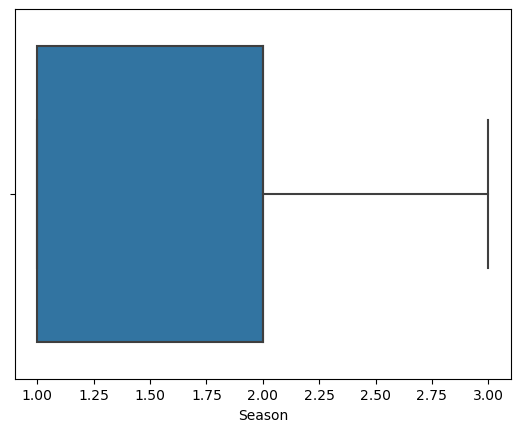

In [40]:
sns.boxplot(data=df_agr,x="Season")

Observation

pesticides_used_category and season are negatively correlated

# Univariate analysis

# Estimated_insects_count

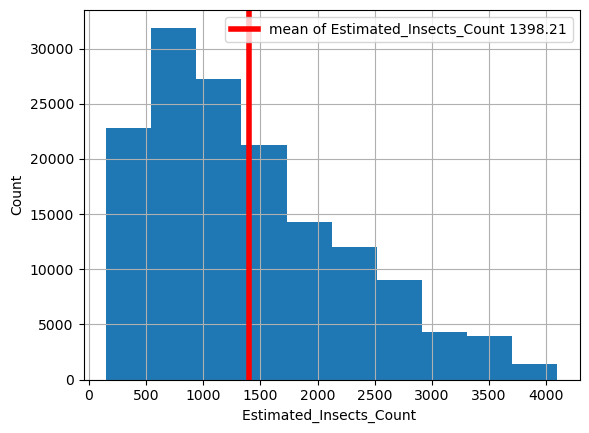

In [41]:
#find the mean of Estimated_Insects_Count using hist plot
df_agr["Estimated_Insects_Count"].hist()
s=df_agr["Estimated_Insects_Count"].mean()
plt.axvline(s,linewidth=4,color="red",label=("mean of Estimated_Insects_Count %0.2f"%s))
plt.xlabel("Estimated_Insects_Count ")
plt.ylabel("Count")
plt.legend()

Observation

The mean of Estimated_insects_count is 1398.21

# Crop_Type  

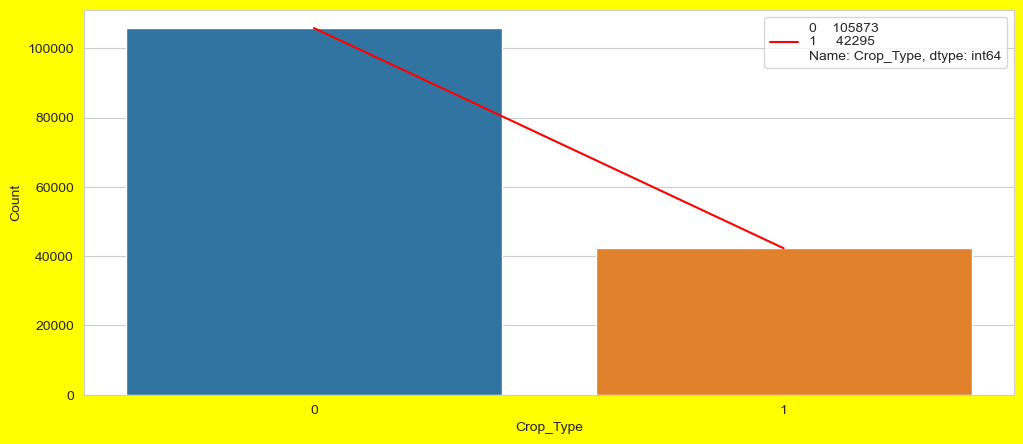

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize=[12,5],facecolor="yellow")
c=df_agr["Crop_Type"].value_counts()
sns.countplot(data=df_agr,x="Crop_Type")
plt.plot(c,color="red",label=c)
plt.xlabel("Crop_Type")
plt.ylabel("Count")
plt.legend()
plt.show()

observation :

Here we observ 0 type crop is more than 100000 and 1 type crop is just little more than 40000

# Soil_Type

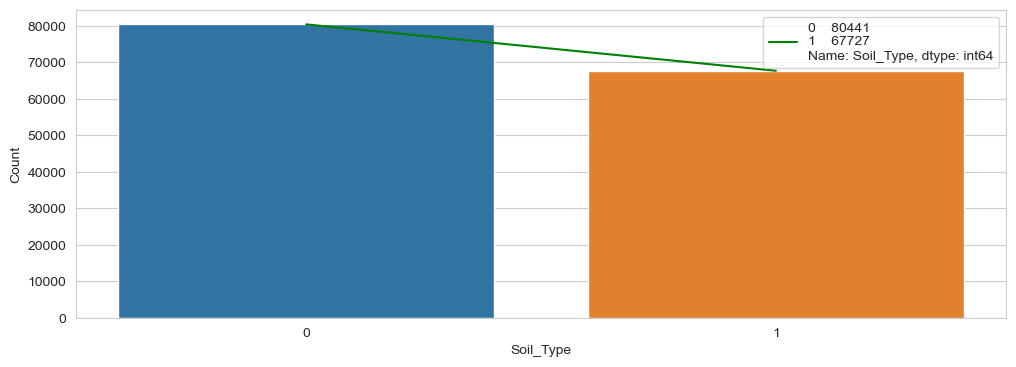

In [48]:
plt.figure(figsize=[12,4])
c=df_agr["Soil_Type"].value_counts()
sns.countplot(data=df_agr,x="Soil_Type")
plt.plot(c,color="green",label=c)
plt.xlabel("Soil_Type")
plt.ylabel("Count")
plt.legend()
plt.show()

Observation

here o type soil have more observation than 1 type

# Pesticide_Use_Category

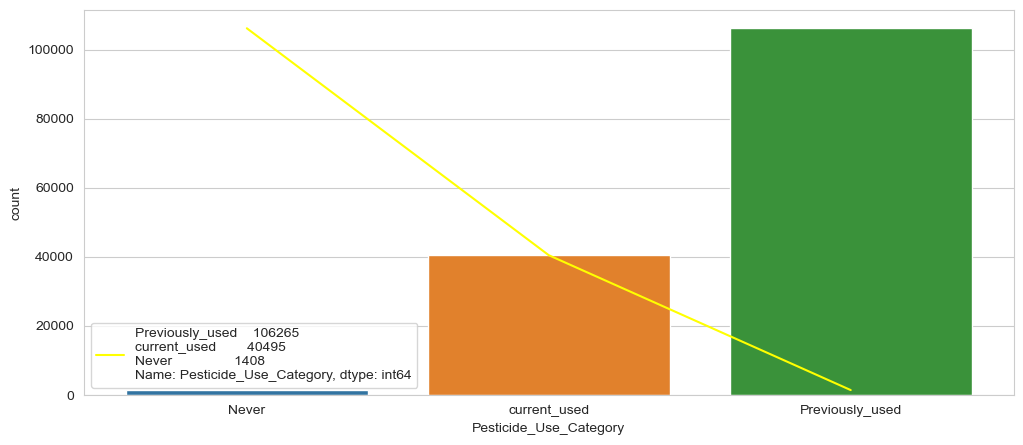

In [51]:
df_agr['Pesticide_Use_Category']=df_agr["Pesticide_Use_Category"].replace({1:"Never",2:"Previously_used",3:"current_used"})
plt.figure(figsize=[12,5])
c=df_agr["Pesticide_Use_Category"].value_counts()
sns.countplot(data=df_agr,x="Pesticide_Use_Category")
plt.plot(c,color="Yellow",label=c)
plt.xlabel("Pesticide_Use_Category")
plt.ylabel("count")
plt.legend()
plt.show()

observation

here we observe more of the pesticides are previously used in the soil

# Number_Doses_Week

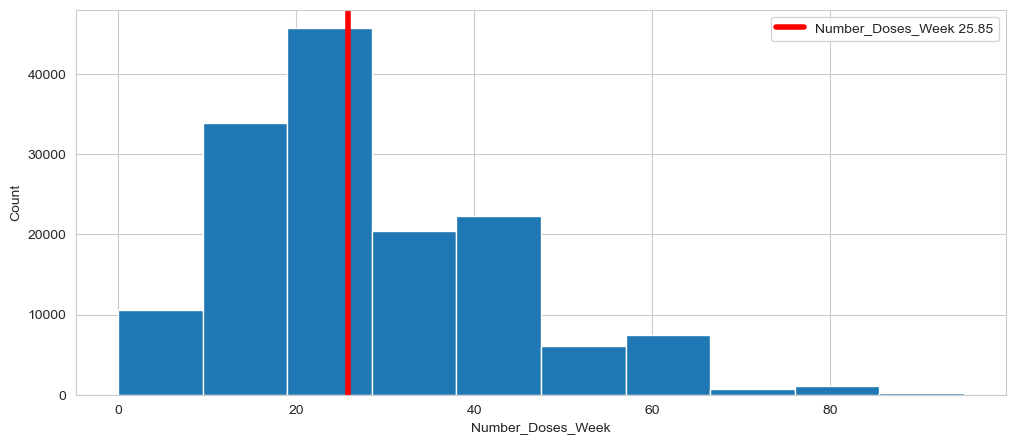

In [54]:
#finding mean of Number_Doses_Week using histplot
plt.figure(figsize=[12,5])
df_agr["Number_Doses_Week"].hist()
c=df_agr["Number_Doses_Week"].mean()
plt.axvline(c,linewidth=4,color="red",label=("Number_Doses_Week %.2f"%c))
plt.xlabel("Number_Doses_Week")
plt.ylabel("Count")
plt.legend()
plt.show()

observation

the mean of Number_Doses_Week is 25.85 ,the average of number of doses per week

# Number_Weeks_Quit 

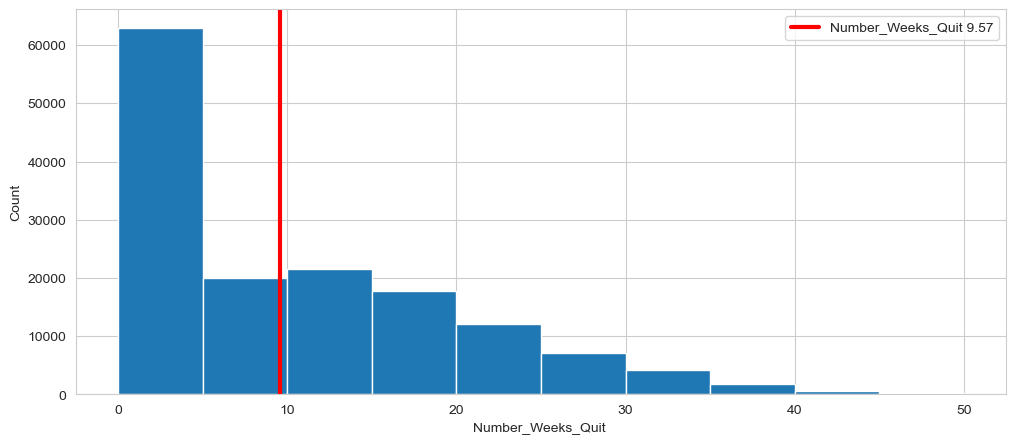

In [56]:
#finding the mean of Number_Weeks_Quit  using the histplot
plt.figure(figsize=[12,5])
df_agr["Number_Weeks_Quit"].hist()
c=df_agr["Number_Weeks_Quit"].mean()
plt.axvline(c,linewidth=3,color="red",label=("Number_Weeks_Quit %0.2f"%c))
plt.xlabel("Number_Weeks_Quit ")
plt.ylabel("Count")
plt.legend()
plt.show()

Observation

The mean of Number_Weeks_Quit is 9.57 but we can see here the number of week quit within 0 to 5 week is much more

# Season

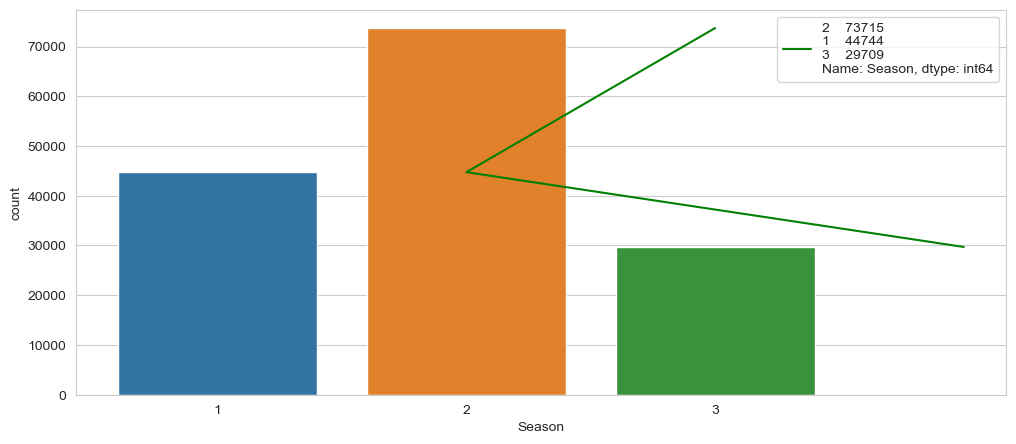

In [57]:
#count the season by countplot
plt.figure(figsize=[12,5])
c=df_agr["Season"].value_counts()
sns.countplot(data=df_agr,x="Season")
plt.plot(c,color="green",label=c)
plt.xlabel("Season")
plt.ylabel("count")
plt.legend()
plt.show()

Here we can wee that most no.of 73715 times crop harvesting in season 2 and 44744 times in season 1,29709 times in season 3

# Crop_Damage

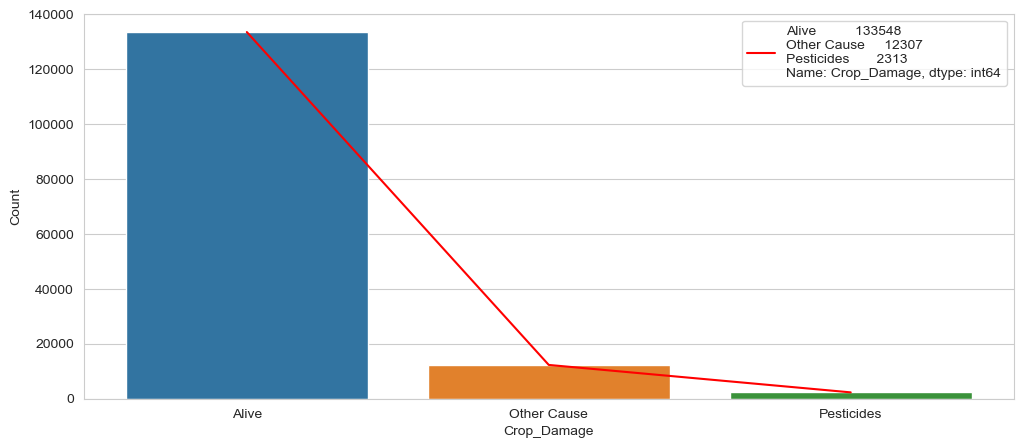

In [63]:
#count the crop damage using countplot
plt.figure(figsize=[12,5])
c=df_agr["Crop_Damage"].value_counts()
sns.countplot(data=df_agr,x="Crop_Damage")
plt.plot(c,color="red",label=c)
plt.xlabel("Crop_Damage")
plt.ylabel("Count")
plt.legend()
plt.show()

Observation

we observe that 133548 no.of crops are alive and 12307 are damage by other cause and 2313 crops are damaged by pesticides